### Pandas project - attacks.csv analysis
Jacobo Maté

In [1]:
import numpy as np # Importamos paquetes
import pandas as pd
import matplotlib.pyplot as plt # He encntrado esta librería para graficar el numero de ataques que ha habido por año

In [2]:
path = '../data/attacks_limpio.csv' # Definimos el path desde el que descargar el csv
df = pd.read_csv(path, encoding = "ISO-8859-1")

In [3]:
pd.set_option('display.max_columns', None)  # ver todas las columnas

pd.set_option('display.max_rows', None)     # ver todas las filas

In [4]:
df.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018.06.25,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,2018-06-08,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,2018-06-04,2018,Provoked,MEXICO,Colima,La Ticla,diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


### Análisis temporal - `date`

In [5]:
# En primer lugar voy a definir una variable que recuente el número de ataques por año
contador = df.groupby('year').size().reset_index(name='Contador ataques')

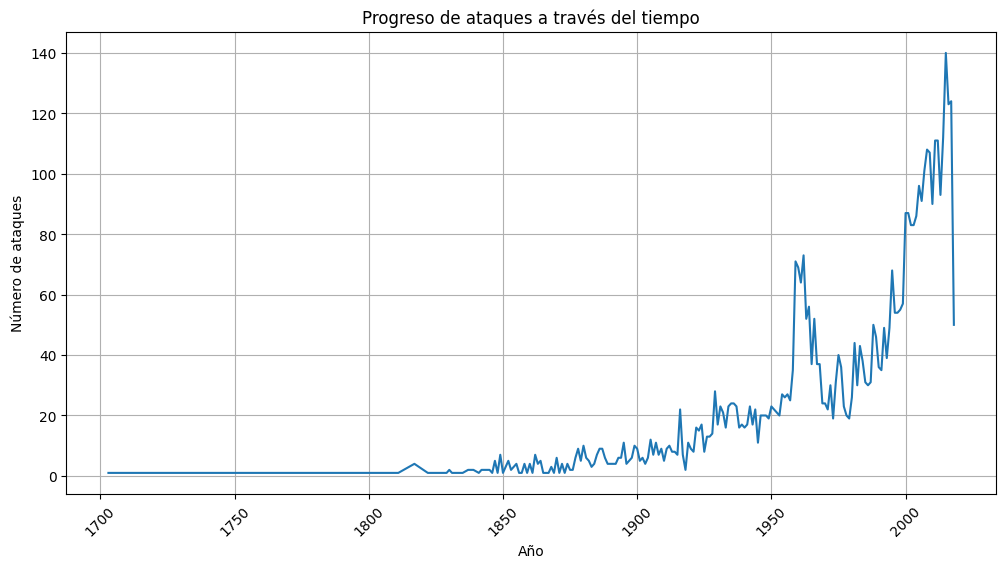

In [6]:
plt.figure(figsize=(12,6))
plt.plot(contador['year'], contador['Contador ataques'])
plt.xlabel('Año')
plt.ylabel('Número de ataques')
plt.title('Progreso de ataques a través del tiempo')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()


De esta gráfica podemos ver un aumento considerable desde el comienzo de la toma de datos, aunque esto seguramente se deba a que antaño no se recogían tantos datos como ahora. Además, debido a la globalización y la evolución de los deportes acuáticos es más común que haya gente en el agua y por tanto es mas posible que se den ataques.
Por otro lado, resulta interesante ver los dos picos de ataque que se dan alrededor de los años sesenta y otro todavía mas pronunciado desde el 2010 hasta el 2020.

### Análisis por zona geográfica - `country` y `area`

In [7]:
df.country.value_counts().head(5) # Aquí mostramos la lista de los top 5 países con más ataques

country
USA             1913
AUSTRALIA       1093
SOUTH AFRICA     496
BRAZIL           100
NEW ZEALAND       89
Name: count, dtype: int64

* Procedemos a mostrar un pie chart con las zonas del país que encabeza la lista 

In [8]:
ataques_usa = df[df.country == 'USA'] # Filtramos los ataques del país con mayor número -> Estados Unidos
ataques_usa.head()

,casenumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatororsource,pdf,hrefformula,href,casenumber.1,casenumber.2,originalorder,unnamed:22,unnamed:23
0,2018.06.25,2018-06-25,2018,Boating,USA,California,"Oceanside, San Diego County",paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,2018-06-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",standing,AdysonÂ McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,2018-06-09,2018,Invalid,USA,Hawaii,"Habush, Oahu",surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
7,2018.05.27,2018-05-27,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,NaN,NaN
8,2018.05.26.b,2018-05-26,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",walking,Cody High,M,15,Lower left leg bitten,N,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,NaN,NaN


In [9]:
recuento_area = ataques_usa.area.value_counts()
top5 = recuento_area.head(5) # Me quedo con los 5 estados con mayor número de ataques para no enmarronar la piechart
otros = pd.Series({'otros': recuento_area[5:].sum()}) # Meto la suma desde el 5 en adelante en un apartado otros

In [10]:
# Combino top5 y otros en un solo dataframe para luego dibujar el pie chart
combi = pd.concat([top5,otros])

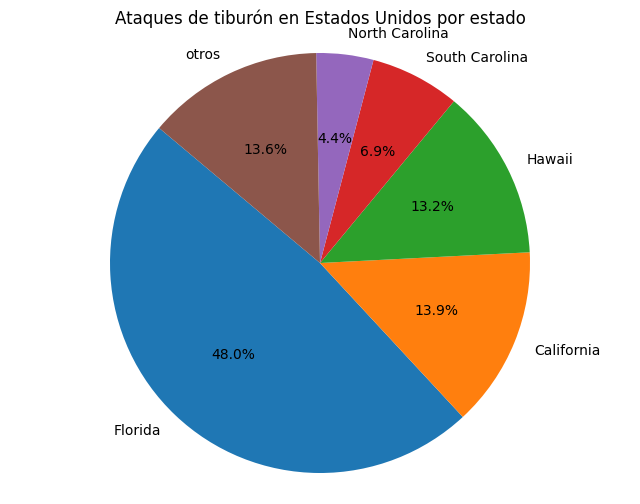

In [11]:
# Meto los resultados en un pie chart - Mostraré los 5 estados con mayor presencia por su cuenta y el resto en una sección 'otros'
plt.figure(figsize=(8,6))
plt.pie(combi, labels=combi.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

plt.title('Ataques de tiburón en Estados Unidos por estado')
plt.show()

### Estudio columna `fatal` y `activity`
* ¿Cómo se relaciona la columna fatal con la columna activity? ¿Existe alguna relación entre ellas?

In [13]:
df.activity.value_counts().head() # Aquí se muestran las 5 actividades con mayor representación de ataques de tiburón

activity
surfing     1343
swimming     884
fishing      795
diving       420
wading       123
Name: count, dtype: int64

In [14]:
# Voy a crear una variable con los indices de estas 5 actividades con mayor representación de ataques
top_actividades = df.activity.value_counts().head().index

# Filtramos el dataframe creando uno nuevo con únicamente los valores pertenecientes a las actividades que nos interesan
df_top = df[df.activity.isin(top_actividades)]

In [16]:
# Puede ser útil crear una pivot table para contar el número de sucesos de cada actividad que acabaron en fatalidad (Y) o no (N)
tabla = pd.crosstab(index=df_top.activity, columns=df_top['fatal(y/n)'])
tabla 

fatal(y/n),N,Y
activity,,
diving,315,105
fishing,698,97
surfing,1223,120
swimming,584,300
wading,113,10


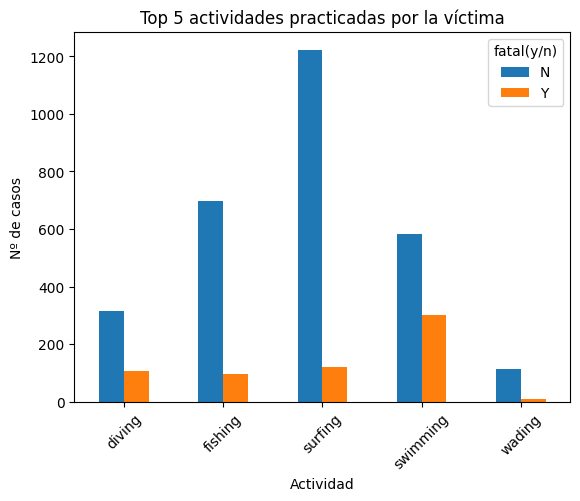

In [21]:
# Una vez tenemos la tabla ya podemos dibujar el histograma:
tabla.plot(kind='bar', stacked=False)
plt.xlabel('Actividad')
plt.ylabel('Nº de casos')
plt.title('Top 5 actividades practicadas por la víctima')
plt.xticks(rotation=45)

plt.show()